# Import 

In [29]:
import pandas as pd
import re
import seaborn as sns
import numpy as np

table_1 = pd.read_csv('data/table_1.csv')
table_2 = pd.read_csv('data/table_2.csv')
loc = pd.read_csv('data/cities_loc.csv')


clean pmid and doi, year_pub > 1975

In [3]:
table_1 = table_1.dropna(subset = ['pmid','doi'])

,pmid,doi,title,source,language,pubtype,pubmodel
0,32837036.0,10.1007/s12291-020-00919-0,"The Pathophysiology, Diagnosis and Treatment o...",MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic"""
1,32196410.0,10.1080/22221751.2020.1746199,Hypothesis for potential pathogenesis of SARS-...,MED,eng,"{""pubType"": [""review-article"", ""Journal Articl...","""Print"""
2,32778421.0,10.1016/j.jiph.2020.07.011,The outbreak of the novel severe acute respira...,MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic"""
3,32730205.0,10.1016/j.ijsu.2020.07.032,"A comparative overview of COVID-19, MERS and S...",MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic"""
6,32394467.0,10.1002/jcp.29785,A global treatments for coronaviruses includin...,MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic"""
...,...,...,...,...,...,...,...
148849,22696127.0,10.1007/s13244-012-0153-4,ECR 2012 Book of Abstracts - A - Postergraduat...,MED,eng,"{""pubType"": [""calendar"", ""Journal Article""]}","""Print"""
148853,4598460.0,10.1289/ehp.747253,Environmental impact of cadmium: a review by t...,MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print"""
148861,3368329.0,10.1093/nar/16.suppl.r315,Codon usage tabulated from the GenBank Genetic...,MED,eng,"{""pubType"": [""Comparative Study"", ""Research Su...","""Print"""
148878,25412402.0,10.1002/14651858.cd000011.pub4,Interventions for enhancing medication adherence.,MED,eng,"{""pubType"": [""Meta-Analysis"", ""Research Suppor...","""Electronic"""


In [13]:
table_2 = table_2[table_2.year_pub > 1975].dropna(subset = ['pmid'])
table_2

,pmid,authors,year_pub,has_data,oa,cited
0,32837036.0,<AUTHOR> Das SK Subir Kumar Das<AFFILIATION>De...,2020.0,N,Y,0
1,32196410.0,<AUTHOR> Lin L Ling Lin<AFFILIATION>Department...,2020.0,N,Y,61
2,32778421.0,<AUTHOR> Bchetnia M Mbarka Bchetnia<AFFILIATIO...,2020.0,N,Y,0
3,32730205.0,<AUTHOR> Liu J Jie Liu<AFFILIATION>Department ...,2020.0,N,Y,0
6,32394467.0,<AUTHOR> Yousefi B Bahman Yousefi<AFFILIATION>...,2020.0,N,Y,1
...,...,...,...,...,...,...
148911,31314321.0,<AUTHOR> Murray J John Murray<AFFILIATION>Haem...,2018.0,N,Y,0
148912,31314312.0,<AUTHOR> Wallhult E Elisabeth Wallhult<AFFILIA...,2018.0,N,Y,0
148913,32091757.0,<AUTHOR> Ljungman P Per Ljungman<AFFILIATION>D...,2019.0,N,Y,0
148914,28590697.0,<AUTHOR> Meslin EM Eric M. Meslin<AFFILIATION>...,2016.0,N,Y,0


# merge

In [16]:
final_table = table_1.merge(table_2, how ='left', on = 'pmid').dropna()
final_table

,pmid,doi,title,source,language,pubtype,pubmodel,authors,year_pub,has_data,oa,cited
0,32837036.0,10.1007/s12291-020-00919-0,"The Pathophysiology, Diagnosis and Treatment o...",MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic""",<AUTHOR> Das SK Subir Kumar Das<AFFILIATION>De...,2020.0,N,Y,0.0
1,32196410.0,10.1080/22221751.2020.1746199,Hypothesis for potential pathogenesis of SARS-...,MED,eng,"{""pubType"": [""review-article"", ""Journal Articl...","""Print""",<AUTHOR> Lin L Ling Lin<AFFILIATION>Department...,2020.0,N,Y,61.0
2,32778421.0,10.1016/j.jiph.2020.07.011,The outbreak of the novel severe acute respira...,MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic""",<AUTHOR> Bchetnia M Mbarka Bchetnia<AFFILIATIO...,2020.0,N,Y,0.0
3,32730205.0,10.1016/j.ijsu.2020.07.032,"A comparative overview of COVID-19, MERS and S...",MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic""",<AUTHOR> Liu J Jie Liu<AFFILIATION>Department ...,2020.0,N,Y,0.0
4,32394467.0,10.1002/jcp.29785,A global treatments for coronaviruses includin...,MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic""",<AUTHOR> Yousefi B Bahman Yousefi<AFFILIATION>...,2020.0,N,Y,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108956,7704896.0,10.1128/cmr.8.1.87-112.1995,Feline immunodeficiency virus: an interesting ...,MED,eng,"{""pubType"": [""Research Support, Non-U.S. Gov't...","""Print""",<AUTHOR> Bendinelli M M Bendinelli<AFFILIATION...,1995.0,N,N,208.0
108967,22696127.0,10.1007/s13244-012-0153-4,ECR 2012 Book of Abstracts - A - Postergraduat...,MED,eng,"{""pubType"": [""calendar"", ""Journal Article""]}","""Print""",<AUTHOR><AFFILIATION>None,2012.0,N,Y,2.0
108969,3368329.0,10.1093/nar/16.suppl.r315,Codon usage tabulated from the GenBank Genetic...,MED,eng,"{""pubType"": [""Comparative Study"", ""Research Su...","""Print""",<AUTHOR> Aota S S Aota<AFFILIATION>National In...,1988.0,N,N,90.0
108970,25412402.0,10.1002/14651858.cd000011.pub4,Interventions for enhancing medication adherence.,MED,eng,"{""pubType"": [""Meta-Analysis"", ""Research Suppor...","""Electronic""",<AUTHOR> Nieuwlaat R Robby Nieuwlaat<AFFILIATI...,2014.0,N,N,222.0


# Create a new variable with the number of authors for each paper

In [39]:
final_table = final_table.assign(nb_aut = final_table.authors.map(lambda aff : len(re.findall('<AUTHOR>',aff))))
final_table[['nb_aut']] = final_table.authors.map(lambda aff : len(re.findall('<AUTHOR>',aff)))


,pmid,doi,title,source,language,pubtype,pubmodel,authors,year_pub,has_data,oa,cited,nb_aut
0,32837036.0,10.1007/s12291-020-00919-0,"The Pathophysiology, Diagnosis and Treatment o...",MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic""",<AUTHOR> Das SK Subir Kumar Das<AFFILIATION>De...,2020.0,N,Y,0.0,1
1,32196410.0,10.1080/22221751.2020.1746199,Hypothesis for potential pathogenesis of SARS-...,MED,eng,"{""pubType"": [""review-article"", ""Journal Articl...","""Print""",<AUTHOR> Lin L Ling Lin<AFFILIATION>Department...,2020.0,N,Y,61.0,4
2,32778421.0,10.1016/j.jiph.2020.07.011,The outbreak of the novel severe acute respira...,MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic""",<AUTHOR> Bchetnia M Mbarka Bchetnia<AFFILIATIO...,2020.0,N,Y,0.0,4
3,32730205.0,10.1016/j.ijsu.2020.07.032,"A comparative overview of COVID-19, MERS and S...",MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic""",<AUTHOR> Liu J Jie Liu<AFFILIATION>Department ...,2020.0,N,Y,0.0,7
4,32394467.0,10.1002/jcp.29785,A global treatments for coronaviruses includin...,MED,eng,"{""pubType"": [""review-article"", ""Review"", ""Jour...","""Print-Electronic""",<AUTHOR> Yousefi B Bahman Yousefi<AFFILIATION>...,2020.0,N,Y,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108956,7704896.0,10.1128/cmr.8.1.87-112.1995,Feline immunodeficiency virus: an interesting ...,MED,eng,"{""pubType"": [""Research Support, Non-U.S. Gov't...","""Print""",<AUTHOR> Bendinelli M M Bendinelli<AFFILIATION...,1995.0,N,N,208.0,9
108967,22696127.0,10.1007/s13244-012-0153-4,ECR 2012 Book of Abstracts - A - Postergraduat...,MED,eng,"{""pubType"": [""calendar"", ""Journal Article""]}","""Print""",<AUTHOR><AFFILIATION>None,2012.0,N,Y,2.0,1
108969,3368329.0,10.1093/nar/16.suppl.r315,Codon usage tabulated from the GenBank Genetic...,MED,eng,"{""pubType"": [""Comparative Study"", ""Research Su...","""Print""",<AUTHOR> Aota S S Aota<AFFILIATION>National In...,1988.0,N,N,90.0,5
108970,25412402.0,10.1002/14651858.cd000011.pub4,Interventions for enhancing medication adherence.,MED,eng,"{""pubType"": [""Meta-Analysis"", ""Research Suppor...","""Electronic""",<AUTHOR> Nieuwlaat R Robby Nieuwlaat<AFFILIATI...,2014.0,N,N,222.0,16


In [43]:
final_table.groupby('oa').agg({'nb_aut':np.mean})

<AxesSubplot:xlabel='nb_aut'>

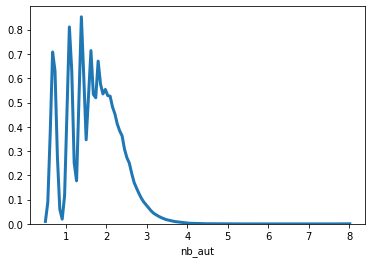

In [33]:
sns.distplot(np.log(final_table.nb_aut +1), hist = False, kde = True,
                 kde_kws = {'linewidth': 3})

# How many papers contains 'deep learning' or 'machine learning' and 'neural network' (also with a 's' for neural networks) in their title ? Create a binary variable to save this information. What is the mean of authors for ML papers and non-ML papers ?
# Transform has_data and oa into binary variable also, what is the share of ML paper that are oa



In [51]:
final_table.title = final_table.title.str.lower()
final_table = final_table.assign(ML = np.where(final_table.title.str.contains('deep learning|machine learning|neural networks?'),1,0),
                                has_data = np.where(final_table.has_data == 'Y', 1 ,0),
                                oa = np.where(final_table.oa == 'Y', 1, 0))



In [54]:
final_table.groupby('ML').agg({'oa':np.mean})

,oa
ML,
0,0.726677
1,0.801802


# Clean up pubtype, for simplicity just get the first type


In [57]:
 final_table[['pub_type']] = final_table.pubtype.map(lambda pubtype : re.findall('\[\"(.*?)\"', pubtype)[0])
    

# What is the pub type with the highest mean/sd of citation ? (use cited and the cleaned pub_type)

In [69]:
final_table.groupby('pub_type').agg(mean = ('cited',np.mean),
                                    sd = ('cited', np.std)).sort_values('mean',ascending = False)

,mean,sd
pub_type,,
Consensus Development Conference,94.128205,392.044048
"Research Support, American Recovery and Reinvestment Act",64.416667,77.222769
"Research Support, U.S. Gov't, P.H.S.",53.980543,97.102551
"Research Support, N.I.H., Intramural",48.481308,144.450609
"Clinical Trial, Phase II",35.285714,74.030740
...,...,...
Webcast,0.000000,0.000000
Addresses,0.000000,NaN
Technical Report,0.000000,0.000000


# Which are the most representative country by year ? You may want to separate rows for each authors to get all countries involved in the paper, in an authors have multiple affiliations, take the first one. Store it in an other tibble, keep only pmid and authors, get the country for each author from the loc_cities.csv.

In [142]:
countries = list(loc.country.str.lower().drop_duplicates())

countries_pd =final_table[['pmid','authors']]
countries_pd = countries_pd.assign(authors =  countries_pd.authors.str.split('<AUTHOR>')).explode('authors')

In [144]:
countries_pd = countries_pd[(countries_pd.authors != '') & (- countries_pd.authors.str.contains('<AFFILIATION>None'))]


In [146]:
countries_pd[['authors']] = countries_pd.authors.map(lambda aff : aff.split('<AFFILIATION>')[1])

<ipython-input-146-86454c611699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_pd[['authors']] = countries_pd.authors.map(lambda aff : aff.split('<AFFILIATION>')[1])
C:\Users\Beta\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [147]:
countries_pd = countries_pd.drop_duplicates()

for abr, name in zip([' USA', ' UK', ' Korea'],
                    ['United States','United Kingdom','South Korea']):
    countries_pd[['authors']] = countries_pd.authors.map(lambda aff: re.sub(abr, name, aff))

<ipython-input-147-d3a6490b1548>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_pd[['authors']] = countries_pd.authors.map(lambda aff: re.sub(abr, name, aff))


In [148]:
countries_pd[['authors']] = countries_pd.authors.str.lower()

<ipython-input-148-6dac7a354966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_pd[['authors']] = countries_pd.authors.str.lower()


In [149]:
countries_pd = countries_pd[countries_pd.authors.map(lambda aff : any([country in aff for country in countries]))]

In [151]:
countries_pd[['country']] = countries_pd.authors.map(lambda aff : [country for country in countries if country in aff][0])


In [153]:
countries_pd_year_pub = countries_pd.merge(final_table[['pmid','year_pub']], how = 'inner', on = 'pmid')

In [155]:
countries_pd_year_pub.groupby(['country','year_pub']).agg({'pmid':len})

pmid
country     year_pub      
afghanistan 2015.0     1.0
            2016.0     2.0
            2019.0     1.0
            2020.0    20.0
albania     2020.0     7.0
...                    ...
zimbabwe    2015.0     1.0
            2016.0     2.0
            2017.0     4.0
            2018.0     3.0
            2020.0    63.0

[1909 rows x 1 columns]

# Select the top 25 of countries involved in coronavirus research since 2001, plot the evolution on a bar chart with plot_ly